<a href="https://colab.research.google.com/github/LawTAGS/Deep-Learning-Classwork/blob/main/DL_01_Logic_Gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import *
from numpy.random import *
from numpy.linalg import *
import matplotlib.pyplot as plt

In [ ]:
sigmoid = lambda Z: 1/(1+exp(-Z))

dsigmoid = lambda A: A*(1-A)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

LogicGate = {
    "AND": [[0], [0], [0], [1]],
    "NAND": [[1], [1], [1], [0]],
    "OR": [[0], [1], [1], [1]],
    "NOR": [[1], [0], [0], [0]],
    "XOR": [[0], [1], [1], [0]],
    "XNOR": [[1], [0], [0], [1]]
}

y = LogicGate["XNOR"]
print(y)

[[1], [0], [0], [1]]


Epoch: 0, Cost: [[1.23708652]]
Epoch: 200, Cost: [[1.]]
Epoch: 400, Cost: [[1.]]
Epoch: 600, Cost: [[1.]]
Epoch: 800, Cost: [[1.]]
[[1.  0.5]
 [0.  0.5]
 [0.  0.5]
 [1.  0.5]]


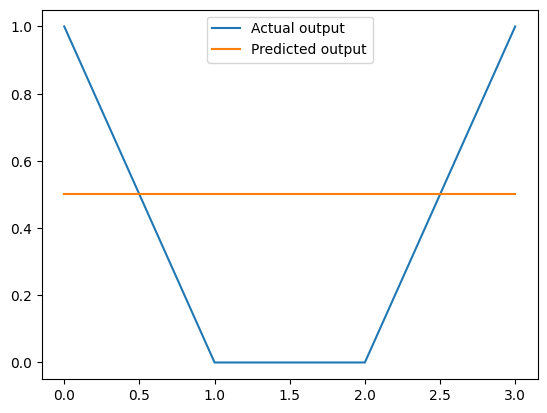

In [ ]:
from os import nice
alpha = 0.9 # Learning rate
epochs = 1000 # Number of training iterations

[N, K] = shape(X) # N = 4 (rows), K = 2 (columns)
Ni = K # Number of neurons in input layer (2)
No = 1 # Number of neurons in output layer (1)

seed(20250303) # To match the result to others
w0 = rand(Ni, No) # Weight matrix of shape (2, 1)
b0 = rand (1, No) # Bias matrix of shape (1, 1)

A0 = X # Input layer activations
yhat = [] # Stores predictions at selected epochs
Cost = [] # Stores cost function value at selected epochs

for idx in range(epochs):
  # Forward propagations
  Z1 = A0 @ w0 + b0 # Compute weighted sum of input
  A1 = sigmoid(Z1) # Compute activation of output layer

  # Compute the cost function (Mean Square Error-like)
  C = (y - A1).T @ (y - A1)

  # Back propagations - Compute gradients
  dCdA1 = -2 * (y - A1) # Derivative of cost w.r.t.A1
  dCdZ1 = dCdA1 * dsigmoid(A1) # Apply sigmoid derivative

  # Compute weight and bias gradients
  dCdW0 = A0.T @ dCdZ1
  dCdB0 = ones([1, N]) @ dCdZ1

  # Update weights and biases
  w0 = w0 - alpha * dCdW0
  b0 = b0 - alpha * dCdB0

  if idx % (epochs / 5) == 0:
    yhat.append(A1.squeeze()) # Store predictions
    Cost.append(C) # Store cost values
    print(f"Epoch: {idx}, Cost: {C}")

# Display the final output comparison target vs. predicted)
print(hstack([y, A1]))

# Plot the actual vs predicted values
plt.plot(y, label="Actual output")
plt.plot(A1, label="Predicted output")
plt.legend()
plt.show()

Epoch: 0, Cost: [[1.43617803]]
Epoch: 200, Cost: [[0.72071873]]
Epoch: 400, Cost: [[0.03900351]]
Epoch: 600, Cost: [[0.01122443]]
Epoch: 800, Cost: [[0.00619512]]
[[1.         0.9715635 ]
 [0.         0.02216206]
 [0.         0.0399161 ]
 [1.         0.96353713]]


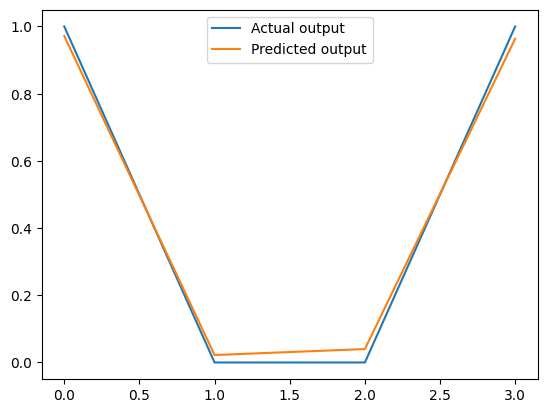

In [ ]:
from os import nice
alpha = 0.9 # Learning rate
epochs = 1000 # Number of training iterations

[N, K] = shape(X) # N = 4 (rows), K = 2 (columns)
Ni = K # Number of neurons in input layer (2)
Nh1 = 3 # Number of neurons in hidden layer 1 (3)
No = 1 # Number of neurons in output layer (1)

seed(20250303) # To match the result to others
w0 = rand (Ni, Nh1) # Weight matrix of shape (2, 1)
b0 = rand (1, Nh1) # Bias matrix of shape (1, 1)
w1 = rand (Nh1, No) # Weight matrix of shape (2, 1)
b1 = rand (1, No) # Bias matrix of shape (1, 1)

# Initialize variables for tracking training progress
A0 = X # Input layer activations
yhat = [] # Stores predictions at selected epochs
Cost = [] # Stores cost function value at selected epochs

for idx in range(epochs):
  # Forward propagations
  # Layer 1 (input to hidden layer)
  Z1 = A0 @ w0 + b0 # Compute weighted sum of input
  A1 = sigmoid(Z1) # Compute activation of output layer

  # Layer 2 (hidden to output layer)
  Z2 = A1 @ w1 + b1 # Compute weighted sum of input
  A2 = sigmoid(Z2) # Compute activation of output layer

  # Compute the cost function (Mean Square Error-like)
  C = (y - A2).T @ (y - A2)

  # Back propagations - Compute gradients
  # Layer 2
  dCdA2 = -2 * (y - A2) # Derivative of cost w.r.t.A1
  dCdZ2 = dCdA2 * dsigmoid(A2) # Apply sigmoid derivative

  # Layer 1
  dCdA1 = dCdZ2 @ w1.T # Derivative of cost w.r.t.A1
  dCdZ1 = dCdA1 * dsigmoid(A1) # Apply sigmoid derivative

  # Compute weight and bias gradients
  dCdW1 = A1.T @ dCdZ2 # Gradient for w1
  dCdW0 = A0.T @ dCdZ1 # Gradient for w0
  dCdB1 = ones([1, N]) @ dCdZ2 # gradient for b1
  dCdB0 = ones([1, N]) @ dCdZ1 # gradient for b0

  # Update weights and biases
  w1 = w1 - alpha * dCdW1
  b1 = b1 - alpha * dCdB1
  w0 = w0 - alpha * dCdW0
  b0 = b0 - alpha * dCdB0

  if idx % (epochs / 5) == 0:
    yhat.append(A2.squeeze()) # Store predictions
    Cost.append(C) # Store cost values
    print(f"Epoch: {idx}, Cost: {C}")

# Display the final output comparison target vs. predicted)
print(hstack([y, A2]))

# Plot the actual vs predicted values
plt.plot(y, label="Actual output")
plt.plot(A2, label="Predicted output")
plt.legend()
plt.show()